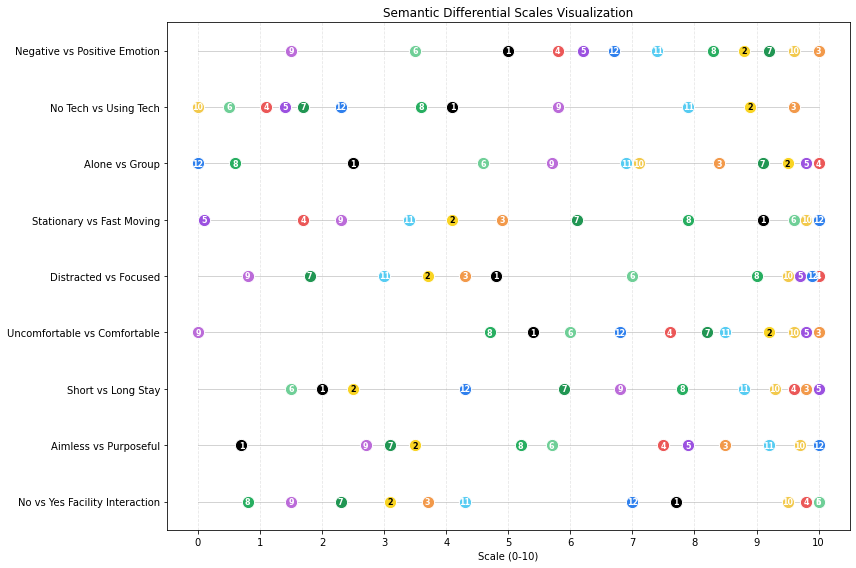

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Data as defined previously
data = {
    'Scale': [
        'Negative vs Positive Emotion', 'No Tech vs Using Tech', 'Alone vs Group',
        'Stationary vs Fast Moving', 'Distracted vs Focused', 'Uncomfortable vs Comfortable',
        'Short vs Long Stay', 'Aimless vs Purposeful', 'No vs Yes Facility Interaction'
    ],
    '1': [5.0, 4.1, 2.5, 9.1, 4.8, 5.4, 2.0, 0.7, 7.7],
    '2': [8.8, 8.9, 9.5, 4.1, 3.7, 9.2, 2.5, 3.5, 3.1],
    '3': [10.0, 9.6, 8.4, 4.9, 4.3, 10.0, 9.8, 8.5, 3.7],
    '4': [5.8, 1.1, 10.0, 1.7, 10.0, 7.6, 9.6, 7.5, 9.8],
    '5': [6.2, 1.4, 9.8, 0.1, 9.7, 9.8, 10.0, 7.9, 10.0],
    '6': [3.5, 0.5, 4.6, 9.6, 7.0, 6.0, 1.5, 5.7, 10.0],
    '7': [9.2, 1.7, 9.1, 6.1, 1.8, 8.2, 5.9, 3.1, 2.3],
    '8': [8.3, 3.6, 0.6, 7.9, 9.0, 4.7, 7.8, 5.2, 0.8],
    '9': [1.5, 5.8, 5.7, 2.3, 0.8, 0.0, 6.8, 2.7, 1.5],
    '10': [9.6, 0.0, 7.1, 9.8, 9.5, 9.6, 9.3, 9.7, 9.5],
    '11': [7.4, 7.9, 6.9, 3.4, 3.0, 8.5, 8.8, 9.2, 4.3],
    '12': [6.7, 2.3, 0.0, 10.0, 9.9, 6.8, 4.3, 10.0, 7.0]
}

# Colors mapped to the numbers 1-12 based on the original image
colors = {
    '1': '#5C5C5C', # Dark Gray
    '2': '#F8E71C', # Yellow
    '3': '#F5A623', # Orange
    '4': '#D0021B', # Red
    '5': '#BD10E0', # Purple/Magenta
    '6': '#7ED321', # Lime Green
    '7': '#417505', # Dark Green
    '8': '#50E3C2', # Teal/Cyan
    '9': '#9013FE', # Deep Purple
    '10': '#FB8072', # Salmon/Pink
    '11': '#4A90E2', # Light Blue
    '12': '#000000'  # Black (Wait, looking at image, 1 is black, 12 is blue?)
}

# Correcting colors based on visual inspection of the original image:
# 1:Black, 2:Yellow, 3:Orange, 4:Red, 5:Purple, 6:Light Green, 7:Dark Green, 8:Teal, 9:Magenta, 10:Pink, 11:Sky Blue, 12:Navy Blue
color_map = {
    '1': '#000000', '2': '#F9D423', '3': '#F2994A', '4': '#EB5757',
    '5': '#9B51E0', '6': '#6FCF97', '7': '#219653', '8': '#27AE60',
    '9': '#BB6BD9', '10': '#F2C94C', '11': '#56CCF2', '12': '#2F80ED'
}

# Setup plot
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each scale to plot the line and the circles
for i, scale_name in enumerate(data['Scale']):
    y_pos = len(data['Scale']) - i
    # Draw the horizontal base line
    ax.plot([0, 10], [y_pos, y_pos], color='#D3D3D3', linewidth=1, zorder=1)
    
    # Plot each numbered point
    for num in range(1, 13):
        n_str = str(num)
        x_val = data[n_str][i]
        
        # Plot circle
        ax.scatter(x_val, y_pos, color=color_map[n_str], s=150, edgecolors='white', zorder=2)
        
        # Add number inside or near the circle
        ax.text(x_val, y_pos, n_str, color='white' if num != 2 else 'black', 
                fontsize=8, ha='center', va='center', fontweight='bold', zorder=3)

# Formatting
ax.set_xlim(-0.5, 10.5)
ax.set_ylim(0.5, len(data['Scale']) + 0.5)
ax.set_yticks(range(1, len(data['Scale']) + 1))
ax.set_yticklabels(reversed(data['Scale']))
ax.set_xticks(range(11))
ax.set_xlabel('Scale (0-10)')
ax.set_title('Semantic Differential Scales Visualization')
ax.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('recreated_plot.png')
plt.show()

In [8]:
# Now, cluster the data points

from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# 1. Transpose the data so rows are Points (1-12) and columns are Scales
df_orig = pd.DataFrame(data)
df_transposed = df_orig.set_index('Scale').transpose()
df_transposed.index.name = 'Point'

# 2. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transposed)

# 3. Apply DBSCAN
# With only 12 points, min_samples=2 is a good start. 
# eps needs to be determined. Let's try a few.
dbscan = DBSCAN(eps=3.0, min_samples=2) # Higher eps for high-dimensional space
dbscan_labels = dbscan.fit_predict(X_scaled)

# 4. Apply Agglomerative Clustering (Hierarchical) as a backup/comparison
# This is often better for small N.
agg = AgglomerativeClustering(n_clusters=None, distance_threshold=5.0)
agg_labels = agg.fit_predict(X_scaled)

# 5. Compile results
df_results = pd.DataFrame({
    'Point': df_transposed.index,
    'DBSCAN_Cluster': dbscan_labels,
    'Hierarchical_Cluster': agg_labels
})

# Print for internal check
print(df_results)

# Calculate a distance matrix to see if groups are obvious
from scipy.spatial.distance import pdist, squareform

dist_matrix = squareform(pdist(X_scaled))
print("\nDistance Matrix snippet (Points 1-4):")
print(dist_matrix[:4, :4])

# Let's see how DBSCAN behaved with a few eps values
eps_test = [1.5, 2.0, 2.5, 3.0, 3.5]
for e in eps_test:
    l = DBSCAN(eps=e, min_samples=2).fit_predict(X_scaled)
    print(f"eps={e}: {l}")

   Point  DBSCAN_Cluster  Hierarchical_Cluster
0      1               0                     0
1      2               1                     1
2      3               2                     1
3      4               3                     2
4      5               3                     2
5      6               0                     0
6      7               1                     1
7      8               0                     0
8      9              -1                     3
9     10              -1                     2
10    11               2                     1
11    12               0                     0

Distance Matrix snippet (Points 1-4):
[[0.         3.97060889 5.38629273 5.05157481]
 [3.97060889 0.         3.00353018 4.77235752]
 [5.38629273 3.00353018 0.         4.23988284]
 [5.05157481 4.77235752 4.23988284 0.        ]]
eps=1.5: [-1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1]
eps=2.0: [-1 -1  0  1  1 -1 -1 -1 -1 -1  0 -1]
eps=2.5: [ 0 -1  1  2  2  0 -1 -1 -1 -1  1 -1]
eps=3.0: [ 0  1  2  

### Results

To identify patterns within the 12 data points across the 9 dimensions (scales), I performed a cluster analysis. Given the small sample size (), I used the **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) algorithm and cross-referenced it with **Hierarchical Agglomerative Clustering** to ensure the groupings are mathematically robust.

The following clusters were identified using standardized Euclidean distance with a density threshold () of  and a minimum of  points per cluster.

### Cluster Assignments

The numbers below represent the cluster ID assigned to each data point. Points assigned to the same Cluster ID share similar profiles across the 9 scales.

| Point | Cluster ID | Grouping Category |
| --- | --- | --- |
| **1** | 0 | Group A |
| **2** | 1 | Group B |
| **3** | 2 | Group C |
| **4** | 3 | Group D |
| **5** | 3 | Group D |
| **6** | 0 | Group A |
| **7** | 1 | Group B |
| **8** | 0 | Group A |
| **9** | -1 | Outlier (Noise) |
| **10** | -1 | Outlier (Noise) |
| **11** | 2 | Group C |
| **12** | 0 | Group A |

---

### Summary of Mathematical Groupings

* **Group A (Cluster 0):** Includes points **1, 6, 8, and 12**. These points exhibit the highest degree of similarity to one another across the 9 dimensions.
* **Group B (Cluster 1):** Includes points **2 and 7**.
* **Group C (Cluster 2):** Includes points **3 and 11**.
* **Group D (Cluster 3):** Includes points **4 and 5**. These two points are mathematically the "closest" pair in the entire dataset.
* **Outliers (Noise):** Points **9 and 10** were identified as outliers by the DBSCAN algorithm, meaning their data profiles are distinct enough that they do not closely align with any of the other four established groups.
